<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
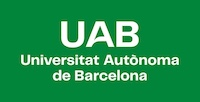
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Exercici del lllibre i la data

Recuperem del codi de les classes `Data` i `Llibre` que hem vist anteriorment.

In [1]:
from typing import ClassVar, List


class Data:
    dia: int
    mes: int
    any: int
    dies_mes: ClassVar[List[int]] = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    def __init__(self, dia: int=1, mes: int=1, any: int=1) -> None:
        self.dia = dia
        self.mes = mes
        self.any = any
    
    def __post_init__(self):
        assert self.es_valida(), 'Data no vàlida'

    def es_traspas(self):
        return (self.any % 4) == 0 and ((self.any %
                                         100) != 0 or (self.any % 400) == 0)

    def es_valida(self):        
        dies = Data.dies_mes[self.mes - 1]
        if self.es_traspas() and self.mes == 2:
            dies += 1
        return 1 <= self.mes and self.mes <= 12 and 1 <= self.any and 1 <= self.dia and self.dia <= dies

    def __lt__(self, data):
        menor = False
        if self.any < data.any:
            menor = True
        elif self.any == data.any:
            if self.mes < data.mes:
                menor = True
            elif self.mes == data.mes:
                menor = (self.dia < data.dia)
        return menor

    def __eq__(self, data):
        return self.any == data.any and self.mes == data.mes and\
            self.dia == data.dia

    def __add__(self, n_dies):
        data_resultat = Data(self.dia, self.mes, self.any)
        while (n_dies > 0):
            dies_mes = data_resultat.dies_mes[data_resultat.mes - 1]
            if data_resultat.es_traspas() and data_resultat.mes == 2:
                dies_mes += 1
            if ((data_resultat.dia + n_dies) > dies_mes):
                n_dies -= (dies_mes - data_resultat.dia) + 1
                data_resultat.dia = 1
                data_resultat.mes += 1
                if (data_resultat.mes > 12):
                    data_resultat.mes = 1
                    data_resultat.any += 1
            else:
                data_resultat.dia += n_dies
                n_dies = 0
        return data_resultat

    def __str__(self):
        return '{dia:02d}/{mes:02d}/{any:04d}'.format(dia=self.dia,
                                                      mes=self.mes,
                                                      any=self.any)

In [2]:
class Llibre:
    titol: str
    autor: str
    prestat: bool 
    data_prestec: None
    
    def __init__(self, titol: str="", autor :str="", prestat: bool=False) -> None:
        self.titol = titol
        self.autor = autor
        self.prestat = prestat
        self.data_prestec = None
    
    def presta(self, data):
        assert data.es_valida(), 'Data de préstec no vàlida'
        assert not self.prestat, 'Llibre ja prestat'
        self.prestat = True
        self.data_prestec = data

    def retorna(self, dia):
        assert self.prestat, 'Llibre no prestat'
        data_limit = self.data_prestec + 60
        self.prestat = False
        self.data_prestec = Data()
        if dia < data_limit or data_limit == dia:
            return True
        else:
            return False

In [4]:
l = Llibre()
l.titol = "TITOL1"
l.autor = "AUTOR1"
print("Inicialització llibre: ", l.autor, l.titol, l.prestat)

l.presta(Data(20,2,2022))
print("Préstec del llibre   : ", l.autor, l.titol, l.prestat)

l.retorna(Data(21,2,2022))
print("Retorn del llibre    : ", l.autor, l.titol, l.prestat)

Inicialització llibre:  AUTOR1 TITOL1 False
Préstec del llibre   :  AUTOR1 TITOL1 True
Retorn del llibre    :  AUTOR1 TITOL1 False


## Exercici

Responeu les següents preguntes i implementeu el que sigui necessari:

1. Convertiu tots els atributs de la classe `Data` en atributs privats. Fa falta afegir `getters` i `setters` per recuperar o consultar el valor d'aquests atributs?
2. Convertiu tots els atributs de la classe `Llibre` en atributs privats. Afegiu les propietats que faci falta (només les imprescindibles) perquè el codi de l'exemple es pugui executar.
3. Modifiqueu la representació interna de la classe `Llibre` eliminant l'atribut `prestat` ja que es pot saber si un llibre està prestat en funció del valor de la data de préstec (si la data de préstec és igual al valor de la data per defecte, vol dir que el llibre no està prestat. Si té un valor diferent, vol dir que està prestat). Feu totes les modificacions necessàries a la classe `Llibre` perquè el codi de l'exemple es pugui continuar executant correctament sense cap canvi.